In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (15.0, 15.0)

In [2]:
from matplotlib import rc
rc('font', size=14)

In [3]:
from numpy import loadtxt, arange, log, delete, array, ones, concatenate
from numpy.linalg import lstsq
from scipy.stats import f
from scipy.stats.mstats import normaltest
from pandas.stats.moments import ewma
from pandas import Series

In [4]:
from common import *

In [5]:
dataset = loadtxt('data.csv', skiprows=1, delimiter=',')
t = arange(dataset.shape[0])
y = dataset[:, 0]
xs = dataset[:, 1:].transpose()
XS = [TimeSeries(x) for x in xs]

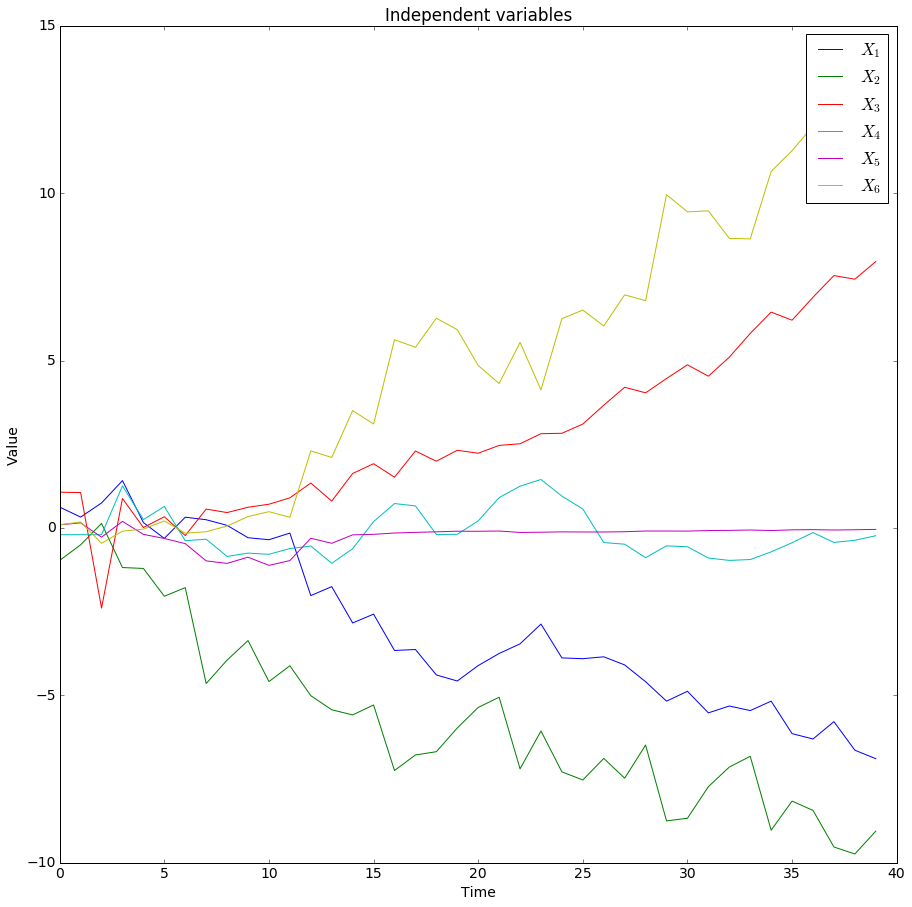

In [6]:
for i, x in enumerate(XS):
    plt.plot(t, x.data, label='$X_%d$'%(i+1))

plt.title('Independent variables')
plt.ylabel('Value')
plt.xlabel('Time')
plt.legend()
plt.show()

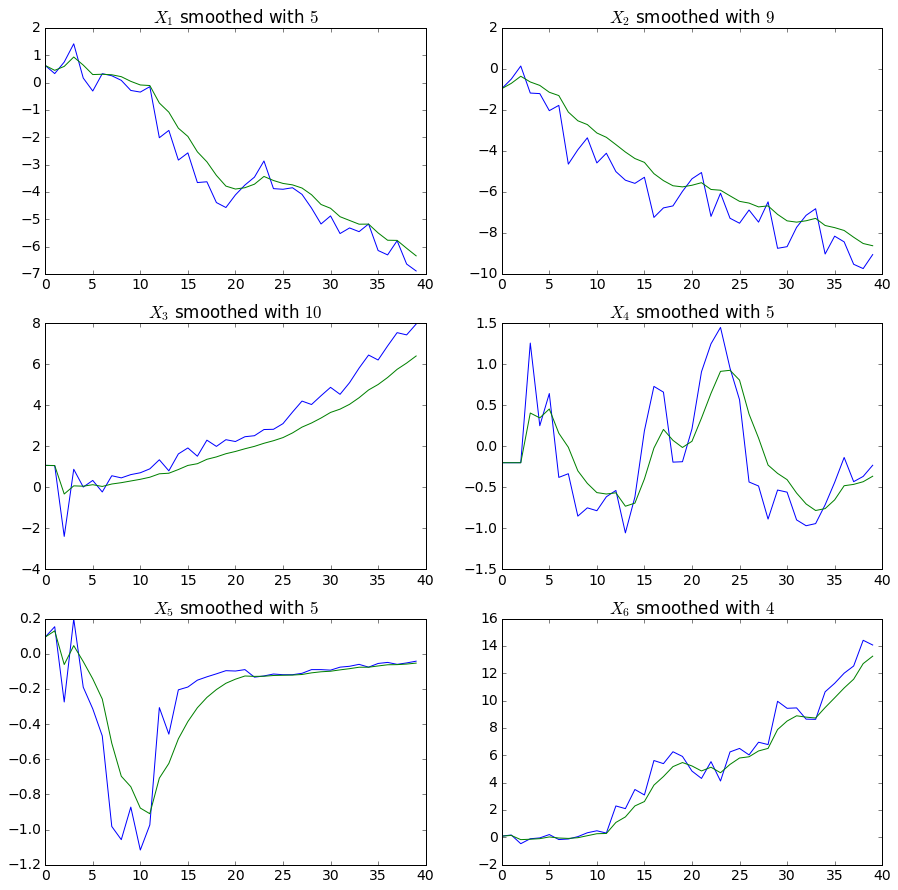

In [7]:
for i, x in enumerate(XS):
    i += 1
    plt.subplot(320 + i)
    plt.title(r'$X_{%d}$ smoothed with $%d$'%(i, x.span))
    plt.plot(x.data)
    plt.plot(x.smoothed)
plt.show()

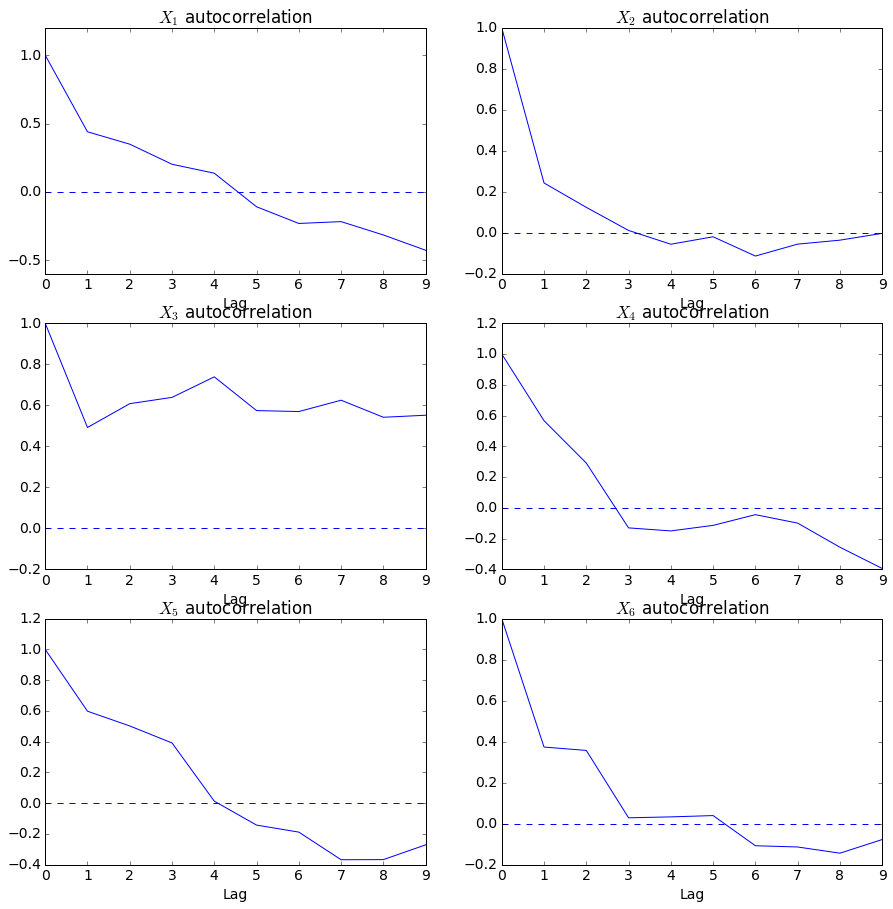

In [8]:
for i, x in enumerate(XS):
    i += 1
    plt.subplot(320 + i)
    plt.title(r'$X_{%d}$ autocorrelation'%i)
    plt.plot(x.autocorrelation)
    plt.axhline(linestyle='--')
    plt.xlabel('Lag')
plt.show()